# Математическая модель shoe shine shop 

Система состоит из двух серверов, интенсивность обслуживания первого сервера – $\mu_1$, интенсивность обслуживания второго – $\mu_2$. 
Требования поступают в систему с интенсивностью $\lambda$

Каждое требование обслуживается по следующей логике: сначала требование обслуживается на сервере 1, затем, если сервер 2 свободен, требование обслуживается на нем. В противном же случае, если сервер 2 занят, требование «ждет», пока другое требование обслужится на сервере 2, причем сервер 1 в это время считается занятым, и другие требования поступать на него не могут.

Введем марковскую цепь на вероятностном пространстве $(\Omega, F, P(.))$.

1. Множество значений.

$X_i \in S$ $\forall  i$, где $S$ состоит из следующих состояний:

$(0, 0)$ - состояние, когда оба сервера никого не обслуживают 

$(1, 0)$ - состояние, когда первый сервер обслуживает требование, второй свободен 

$(0, 1)$ - состояние, когда первый сервер свободен, второй обслуживает

$(1, 1)$ - состояние, когда оба сервера обслуживают требования

$(b, 1)$ - состояние, когда второй сервер обслуживает, а первый закончил обслуживание. Однако первый "заблокирован" для поступления нового требования


2. Начальное распределение имеет следующий вид: 

$p = (1, 0, 0, 0, 0) $

или же 

$P(X_0 = (0,0)) = 1$

3. Составим матрицу переходов.

Вычислим все вероятности перехода, не равные 0. 

$P(X_i = (1,0) | X_{i-1} = (0,0)) = 1 $ - 

$P(X_i = (0,1) | X_{i-1} = (1,0)) = 1 $ - так как второй сервер свободен, после обслуживания на первом сервере требование сразу же переходит на обслуживание на втором сервере, освобождая первый

$P(X_i = (0,1) | X_{i-1} = (b,1)) = 1 $ - первое требование обслужилось и ждет, пока освободится второй сервер. Как только он освобождается, требование сразу начинает обслуживаться на втором сервера, освобождая первый 

$P(X_i = (1,1) | X_{i-1} = (0,1))$ - это вероятность того, что новое требование придет на первый сервер раньше, чем предыдущее требование обслужится на втором сервере. $(*)$

Обозначим случайную величину, обозначающую время между приходом двух требований за Z (~ exp($\lambda$)), а время обслуживания требования на втором сервере за Y (~ exp($\mu_2$)). Тогда, чтобый найти вероятность $(*)$, нужно вычислить следующую вероятность: 

$P(Z < Y) = \int_{0}^{+ \infty} P(Z < Y | Y = y) * \mu_2e^{-y\mu_2} \,dy = \int_{0}^{+ \infty} (1-e^{-y\lambda}) * \mu_2e^{-y\mu_2} \,dy =  \frac{\lambda}{\lambda + \mu_2}$

Таким образом, 

$P(X_i = (1,1) | X_{i-1} = (0,1)) = \frac{\lambda}{\lambda + \mu_2}$

и

$P(X_i = (0,0) | X_{i-1} = (0,1)) = 1 - \frac{\lambda}{\lambda + \mu_2} = \frac{\mu_2}{\lambda + \mu_2}$

$P(X_i = (b,1) | X_{i-1} = (1,1))$ - это вероятность того, что первый сервер закончит обслуживание требования до того, как закончит второй. $(**)$

Обозначим случайную величину, обозначающую время обслуживания на сервере 1 за Z (~ exp($\mu_1$)), а время обслуживания требования на втором сервере за Y (~ exp($\mu_2$)). Тогда чтобый найти вероятность $(**)$, нужно вычислить следующую вероятность: 

$P(Z < Y) = \int_{0}^{+ \infty} P(Z < Y | Y = y) * \mu_2e^{-y\mu_2} \,dy = \int_{0}^{+ \infty} (1-e^{-y\mu_1}) * \mu_2e^{-y\mu_2} \,dy =  \frac{\mu_1}{\mu_1 + \mu_2}$

Таким образом, 

$P(X_i = (b,1) | X_{i-1} = (1,1)) = \frac{\mu_1}{\mu_1 + \mu_2}$

и

$P(X_i = (1,0) | X_{i-1} = (1,1)) = 1 - \frac{\mu_1}{\mu_1 + \mu_2} = \frac{\mu_2}{\mu_1 + \mu_2}$

Теперь можем составить матрицу переходных вероятностей:

$
\mathbb{P} = 
\begin{pmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 \\
\frac{\mu_2}{\lambda + \mu_2} & 0 & 0 & \frac{\lambda}{\lambda + \mu_2} & 0\\ 
0 & 0 & \frac{\mu_2}{\mu_1 + \mu_2} & 0 & \frac{\mu_1}{\mu_1 + \mu_2} \\ 
0 & 1 & 0 & 0 & 0 \\
\end{pmatrix}
$

# Проверка корректности результатов программы

Сейчас попробуем определить, корректны ли полученные характеристики в ходе проведения эксперимента.


Для начала стоит отметить, что в данной модели не хватит лишь количества человек в системе для каждого состояния.<br>
Поскольку у нас 2 обрабатывающих сервера, то состояния нужно учитывать для обоих. Это возможные 5 состояний системы:<br>
<ol>
  <li>(0,0) - оба сервера ничего не обратбатывают</li>
  <li>(1,0) - первый сервер обрабатывает запрос, второй ожидает</li>
  <li>(0,1) - второй сервер обрабатывает запрос, первый ожидает</li>
  <li>(1,1) - оба сервера обрабатывают запросы</li>
  <li>(b,1) - первый сервер уже обработал и не может отправить запрос второму, пока тот обрабатывает другой запрос</li>
</ol>

Исходя из того, что интенсивность прихода равна $\lambda$, и интенсивность обработки запросов на первом и втором серверах соответственно $\mu_1$ и $\mu_2$, то получается следующая Марковская цепь состояний нашей модели : 
<img src="mark_chain.PNG">

Следовательно, теперь можем расписать входной и выходной поток для каждого состояния : 
<ul>
  <li>(0,0) :  $\lambda * \pi_{00} = \mu_2 * \pi_{01}$</li>
  <li>(1,0) :  $\mu_1 * \pi_{10} = \lambda * \pi_{00} + \mu_2 * \pi_{11}$</li>
  <li>(0,1) :  $(\mu_2 + \lambda) * \pi_{01} = \mu_1 * \pi_{10} + \mu_2 * \pi_{b1}$</li>
  <li>(1,1) :  $(\mu_1 + \mu_2) * \pi_{11} = \lambda * \pi_{01}$</li>
  <li>(b,1) :  $\mu_1 * \pi_{11} = \mu_2 * \pi_{b1}$</li>
</ul>
<br><br>
Выполняя линейные преобразования с системой, получаем следующие значения:<br>
\begin{equation}\
\pi_{00} * (1, \frac{\lambda}{\mu_1} + \frac{\lambda^2}{(\mu_1 + \mu_2) * \mu_1}, \frac{\lambda}{\mu_2}, \frac{\lambda^2}{(\mu_1 + \mu_2) * \mu_2}, \frac{\mu_1 * \lambda^2}{\mu_2^2 * (\mu_1 + \mu_2)})
\end{equation}

<br><br>
Теперь можем сделать подстановку значений, использованных в экспериментах и найти стационарное распределение:

### Эксперимент 1
При $\lambda = 0,5$, $\mu_1 = 0,9$ и $\mu_2 = 0,2$ получаем следующие значения стационарного распределения (теоритические): <br>

\begin{equation}\ \pi_{00}  \approx 0.024; \end{equation}
\begin{equation}\ \pi_{10}  \approx 0.076; \end{equation}
\begin{equation}\ \pi_{01}  \approx 0.236; \end{equation}
\begin{equation}\ \pi_{11}  \approx 0.107; \end{equation}
\begin{equation}\ \pi_{b1}  \approx 0.484; \end{equation}

При этом написанная программа, реализующая работу мат. модели Shoe Shine Shop, выдает следующие результаты:
#### Вывод : 
Данное стационарное распределение получилось логичным, поскольку первый сервер обрабатывает запросы в 4,5 раза быстрее второго, поэтому наиболее вероятными в таком случае будут состояния , когда на запрос на первом сервере обработан, а на втором сервере еще обрабатывается другой запрос. <br>
И второе состояние, когда первый сервер пустует, а второй обрабатывает.

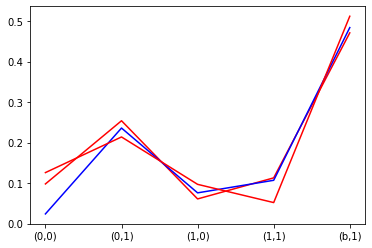

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
res_arr = [[0.098, 0.254, 0.061, 0.113, 0.471], [0.024, 0.236, 0.076, 0.107, 0.484],
          [0.126, 0.214, 0.097, 0.052,  0.512]]
names = ["test_1", "test_2", "therory"]
cols = ["(0,0)", "(0,1)", "(1,0)", "(1,1)", "(b,1)"]
results = pd.DataFrame(data=res_arr, columns=cols)
results["name"] = names

plt.plot(cols[:5], (results.loc[0])[:5], 'r')
plt.plot(cols[:5], (results.loc[1])[:5], 'b')
plt.plot(cols[:5], (results.loc[2])[:5], 'r')

### Эксперимент 2

При $\lambda = 0,25$, $\mu_1 = 1$ и $\mu_2 = 1$ получаем следующие значения стационарного распределения (теоритические): <br>

\begin{equation}\ \pi_{00}  \approx 0,627; \end{equation}
\begin{equation}\ \pi_{10}  \approx 0,176; \end{equation}
\begin{equation}\ \pi_{01}  \approx 0,156; \end{equation}
\begin{equation}\ \pi_{11}  \approx 0,019; \end{equation}
\begin{equation}\ \pi_{b1}  \approx 0,019; \end{equation}


При этом написанная программа, реализующая работу мат. модели Shoe Shine Shop, выдает следующие результаты:



#### Вывод :
Здесь же видно, что серверы обрабатывают запросы гораздо быстрее, чем они поступают, поэтому чаще всего в данной системе оба сервера будут ожидать, о чем и говорит стационарное распределение.

In [30]:
res_arr = [[0.656, 0.187, 0.112, 0.012, 0.030], [0.630, 0.219, 0.068, 0.073, 0.008],
          [0.585,  0.119, 0.151, 0.121, 0.022], [ 0.676, 0.108, 0.117, 0.084, 0.013], [0.627, 0.176, 0.156, 0.019, 0.019]]
names = ["test_1", "test_2", "test_3", "test_4", "therory"]
cols = ["(0,0)", "(0,1)", "(1,0)", "(1,1)", "(b,1)"]
results = pd.DataFrame(data=res_arr, columns=cols)
results["name"] = names

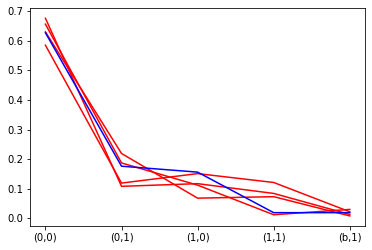

In [26]:
plt.plot(cols[:5], (results.loc[0])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[1])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[2])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[3])[:5], 'r', label='label here')
plt.plot(cols[:5], (results.loc[4])[:5], 'b', label='label here')
#plt.plot(<X AXIS VALUES HERE>, <Y AXIS VALUES HERE>, 'line type', label='label here')
#plt.legend(loc='best')
plt.show()